In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Converting from probability to sigma
In the realm of research, if your findings have a certain probability, its customary to present these findings not as the raw probability, but as the equivalent standard deviation of a normal distribution. In other words, for each probability there is a correlating sigma value. This correlated value is found by summing over the normal distribution up to said value, the means of which are detailed below.

In [45]:
plt.rcParams['figure.figsize'] = (15, 10)
d = stats.norm.rvs(loc = 3, scale = 0.01, size = 100000)
plt.rcParams.update({'font.size': 22})

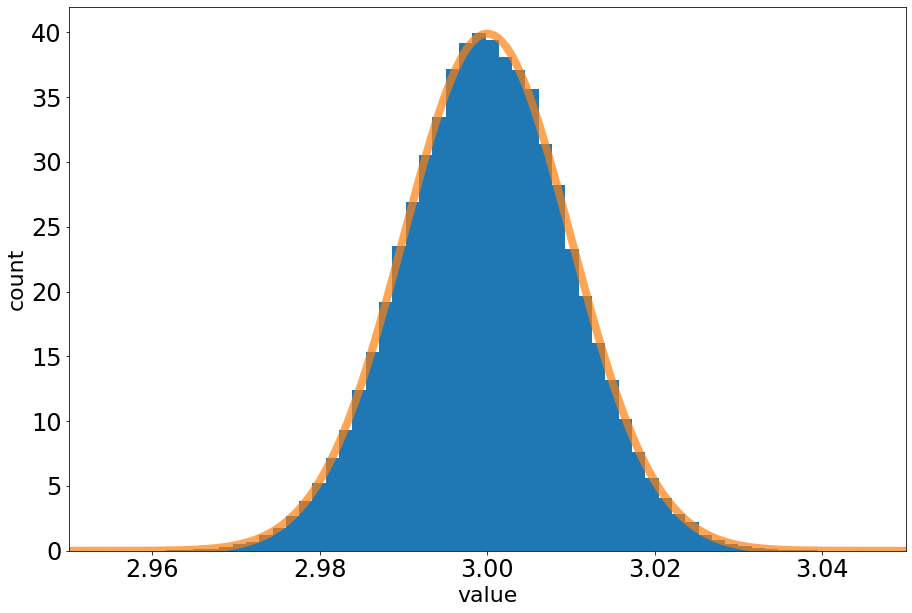

In [47]:
# Plot of a normal distribution of mean 3, stdev 0.01
fig, ax = plt.subplots(1,1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize=24)
plt.xlim(2.95, 3.05)
x = np.linspace(2.95, 3.05, 1000)
ax.set_xlabel('value')
ax.set_ylabel('count')
ax.tick_params(labelsize=24)
ax.plot(x, stats.norm.pdf(x, loc=3,scale=0.01), linewidth = 8, alpha = 0.7)

Use the stats.norm.cdf function to integrate over the gaussian up to a given sigma. This will give you the associated probability with a given standard deviation value.

In [19]:
def sigma_to_prob(sigma: float, mean=0., stdev=1.):
    return stats.norm.cdf(sigma, loc=mean, scale=stdev)

In [20]:
for x in range(-4, 5, 1):
    print('sigma: {} probability: {:.3f}'.format(x,sigma_to_prob(x)))

sigma: -4 probability: 0.000
sigma: -3 probability: 0.001
sigma: -2 probability: 0.023
sigma: -1 probability: 0.159
sigma: 0 probability: 0.500
sigma: 1 probability: 0.841
sigma: 2 probability: 0.977
sigma: 3 probability: 0.999
sigma: 4 probability: 1.000


The stats.norm.ppf function returns the opposite: for a given probability what is the associated standard deviation?

In [21]:
def prob_to_sigma(prob: float, mean=0., stdev=1.):
    return stats.norm.ppf(prob, loc=mean, scale=stdev)

In [22]:
probs = np.linspace(0, 1, 9)
for x in probs:
    print('probability: {:.3f} sigma: {:.3f}'.format(x,prob_to_sigma(x)))

probability: 0.000 sigma: -inf
probability: 0.125 sigma: -1.150
probability: 0.250 sigma: -0.674
probability: 0.375 sigma: -0.319
probability: 0.500 sigma: 0.000
probability: 0.625 sigma: 0.319
probability: 0.750 sigma: 0.674
probability: 0.875 sigma: 1.150
probability: 1.000 sigma: inf


# Exponential Distributions
Exponential distributions are described by the function given here:

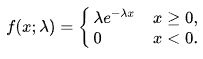

Where lambda is a parameter equal to both 1/mean and the scale parameter used in scipy.

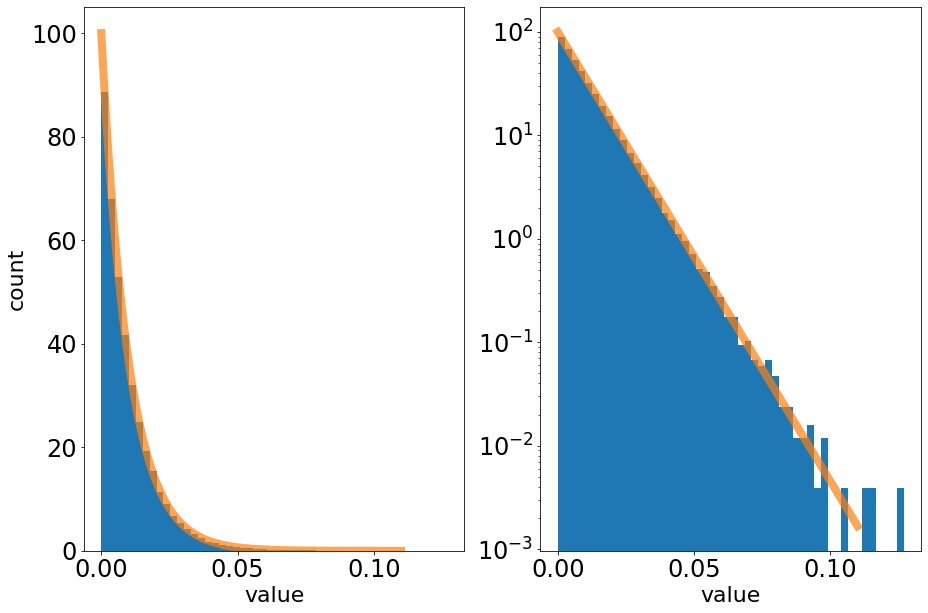

In [51]:
d = stats.expon.rvs(loc = 0, scale = .01, size = 100000)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_xlabel('value')
ax2.set_xlabel('value')
ax1.set_ylabel('count')
ax1.hist(d, 50, density=True)
ax1.tick_params(labelsize=24)
x = np.linspace(0, .11, 1000)
ax1.plot(x, stats.expon.pdf(x, loc=0,scale=.01), linewidth = 8, alpha = 0.7)
ax2.set_yscale('log')
ax2.tick_params(labelsize=24)
ax2.hist(d, 50, density=True)
ax2.plot(x, stats.expon.pdf(x, loc=0,scale=.01), linewidth = 8, alpha = 0.7)

Above are two plots that describe an exponential distribution with a lambda of 100, or a mean of 0.01.

If, for example, we had a signal candidate at x = 0.06, what is the probability that our signal candidate is not background noise?

In [61]:
prob = stats.expon.cdf(0.06, loc=0, scale=0.01)
signal_sigma = prob_to_sigma(prob)
print('probability: {:.3f} sigma: {:.3f}'.format(prob, signal_sigma))

probability: 0.998 sigma: 2.810


So for this particular exponential distribution there is a probability of 0.998 or 2.81 sigma that a reading at this value is not background. How does this probability change with different values/parameters?

In [66]:
for x in np.arange(0.06, .1, 0.01):
    prob = stats.expon.cdf(x, loc=0,scale=0.01)
    print('probability: {:.6f} sigma: {:.6f}'.format(prob, prob_to_sigma(prob)))
print()
for x in np.arange(0.06, .1, 0.01):
    prob = stats.expon.cdf(x, loc=0, scale=0.05)
    print('probability: {:.6f} sigma: {:.6f}'.format(prob, prob_to_sigma(prob)))
print()
for x in np.arange(0.06, 0.1, 0.01):
    prob = stats.expon.cdf(x, loc=0, scale=0.005)
    print('probability: {:.6f} sigma: {:.6f}'.format(prob, prob_to_sigma(prob)))

probability: 0.997521 sigma: 2.809782
probability: 0.999088 sigma: 3.117525
probability: 0.999665 sigma: 3.401193
probability: 0.999877 sigma: 3.665538
probability: 0.999955 sigma: 3.913946

probability: 0.698806 sigma: 0.520969
probability: 0.753403 sigma: 0.685238
probability: 0.798103 sigma: 0.834866
probability: 0.834701 sigma: 0.972911
probability: 0.864665 sigma: 1.101520

probability: 0.999994 sigma: 4.372407
probability: 0.999999 sigma: 4.790573
probability: 1.000000 sigma: 5.177341
probability: 1.000000 sigma: 5.538772
probability: 1.000000 sigma: 5.879209


It seems from these results that higher values of scale indicate a more "wide" distribution per say, as the summed probability up to the same point is lower. Likewise, as the values increase, so too does the correponding sigma. This makes intuitive sense since as you move right, there are more probabilities of values you are summing over.

# Poisson Distributions

For poisson distributions, they predict the probability of independently probable events occurring a certain amount of times within a given timeframe. This is why the distribution is non-continuous, as an event cannot occur a non-integer number of times. The lone parameter mu describes both the mean and variance of the distribution, while a location parameter can be added to shift the distribution to a specific position. Let's start by plotting a couple poisson distributions with different parameters to get a sense of how they act.

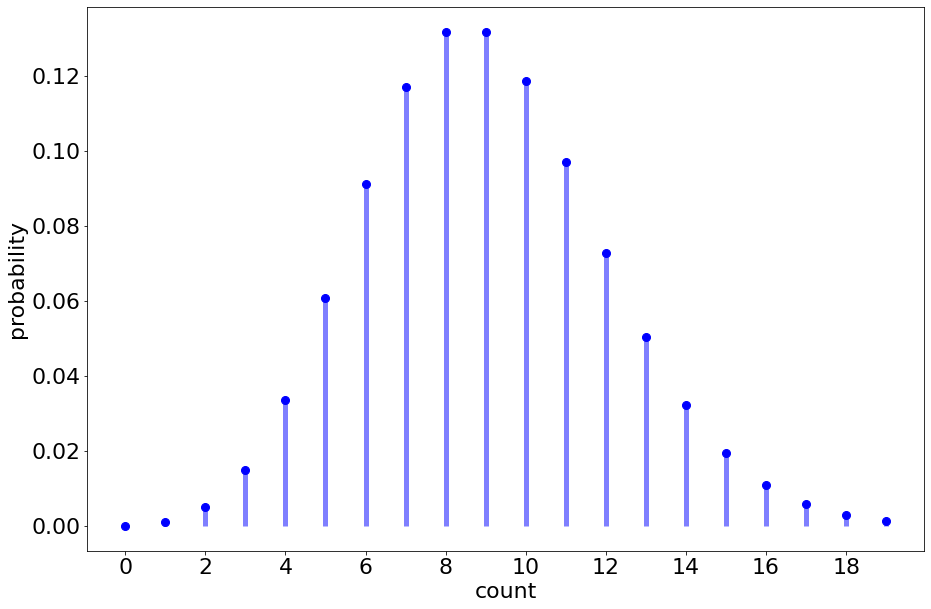

In [73]:
fig, ax = plt.subplots(1,1)
mu = 9
ax.set_xticks(range(0,20,2))
ax.set_xlabel('count')
ax.set_ylabel('probability')
x = np.arange(stats.poisson.ppf(0.0001, mu), stats.poisson.ppf(0.999, mu))
ax.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

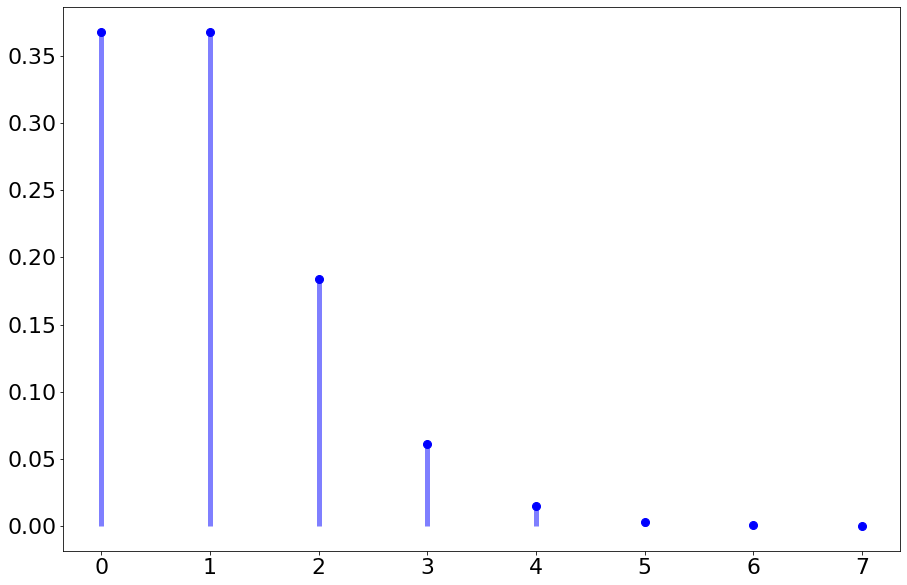

In [74]:
fig, ax = plt.subplots(1,1)
mu = 1
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99999, mu))
ax.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

For the above distribution, what is the probability that a signal candidate at four events is not background?

In [83]:
prob = stats.poisson.cdf(4, 1)
sigma = prob_to_sigma(prob)
print('probability: {:.3f} sigma: {:.3f}'.format(prob, sigma))

probability: 0.996 sigma: 2.682


The implications of this type of distribution of experiments means that there are only a certain number of specific outcomes that one can record. For example, using the distribution above, if the "signal" you're looking for means an event occurs four times, there is only one associated sigma, and without making changes to the experiment your results cannot realistically  be further improved upon.

While the outcomes must be discrete, the parameters of the distribution are not necessarily discrete. The mean and variance for example, change continuously as data is collected and added to the distribution. This is continuous in the same way as taking the mean of a set of integers is not necessarily an integer but rather tells you the average of this set.